In [13]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , r2_score
import matplotlib.pyplot as plt
import numpy as np 
import pickle

In [14]:
data = pd.read_csv('delaney_solubility_with_descriptors.csv')
data

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [15]:
x = data.drop(['logS'] , axis = 'columns')
y = data['logS']

In [16]:
model = linear_model.LinearRegression()
model.fit(x , y)

LinearRegression()

In [17]:
y_pred = model.predict(x)
y_pred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

In [18]:
mean_squared_error(y , y_pred)

1.0096023011483513

In [19]:
r2_score(y , y_pred)

0.770099670806285

In [20]:
model.coef_

array([-0.74173609, -0.00659927,  0.00320051, -0.42316387])

In [24]:
print(f'logS = ({round(model.coef_[0],2)})*molLogP + ({round(model.coef_[1],2)})*Molar weight + ({round(model.coef_[2],2)})*Number of rotatable bonds + ({round(model.coef_[3],2)})*Aromatic Proportion + ({round(model.intercept_,2)})')

logS = (-0.74)*molLogP + (-0.01)*Molar weight + (0.0)*Number of rotatable bonds + (-0.42)*Aromatic Proportion + (0.26)


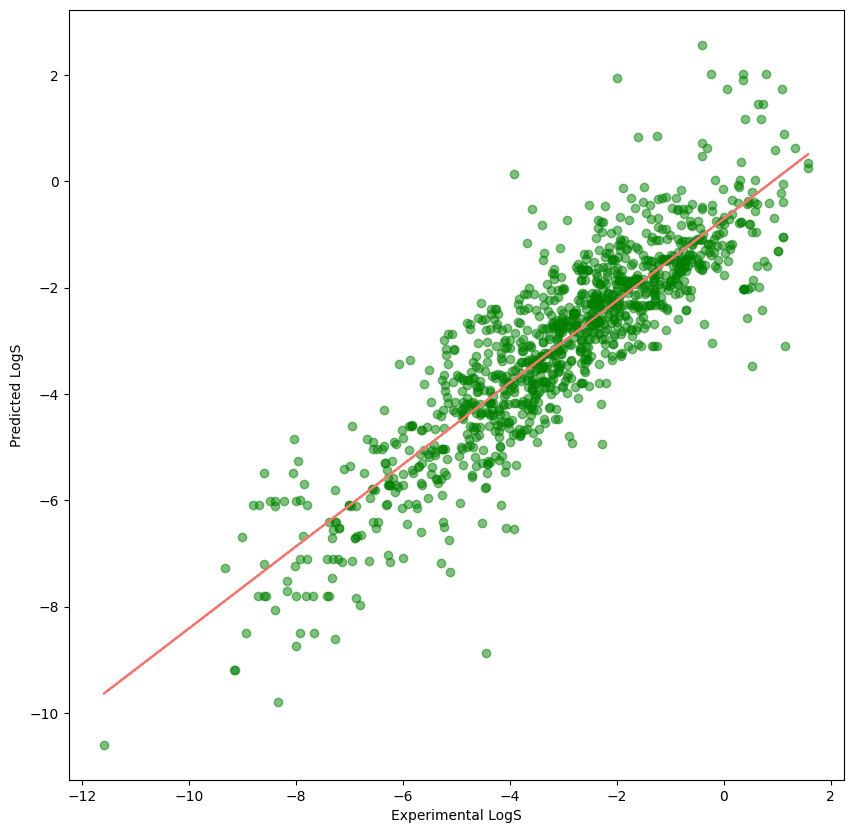

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(x = y , y = y_pred , c = 'green' , alpha=0.5)
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')
plt.savefig('visualise.png')

In [23]:
pickle.dump(model , open('solubility_model.pkl' , 'wb'))